# Task-3

In [2]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from data_processing import * 
from forecasting import *
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf

## Load Data and model

- Load data

In [3]:
tsla = load_close_data('tsla')
bnd = load_close_data('bnd')
spy = load_close_data('spy')


2024-11-14 12:36:13,024 - INFO - Loading tsla data...
[*********************100%***********************]  1 of 1 completed
2024-11-14 12:36:17,082 - INFO - Data loaded 
2024-11-14 12:36:17,082 - INFO - Loading bnd data...
[*********************100%***********************]  1 of 1 completed
2024-11-14 12:36:17,426 - INFO - Data loaded 
2024-11-14 12:36:17,426 - INFO - Loading spy data...
[*********************100%***********************]  1 of 1 completed
2024-11-14 12:36:17,782 - INFO - Data loaded 


- save files as csv

In [ ]:
save_file(tsla,'tsla')
save_file(bnd, 'bnd')
save_file(spy,'spy')

In [10]:
tsla.head()

,Price
Date,
2015-01-02 00:00:00+00:00,14.620667
2015-01-05 00:00:00+00:00,14.006000
2015-01-06 00:00:00+00:00,14.085333
2015-01-07 00:00:00+00:00,14.063333
2015-01-08 00:00:00+00:00,14.041333


- Load Model

In [ ]:
model_path = '../models/best_model.pkl'
lstm_model = joblib.load(model_path)
num_prediction = 365
look_back = 60

- Tesla stock one year prediction

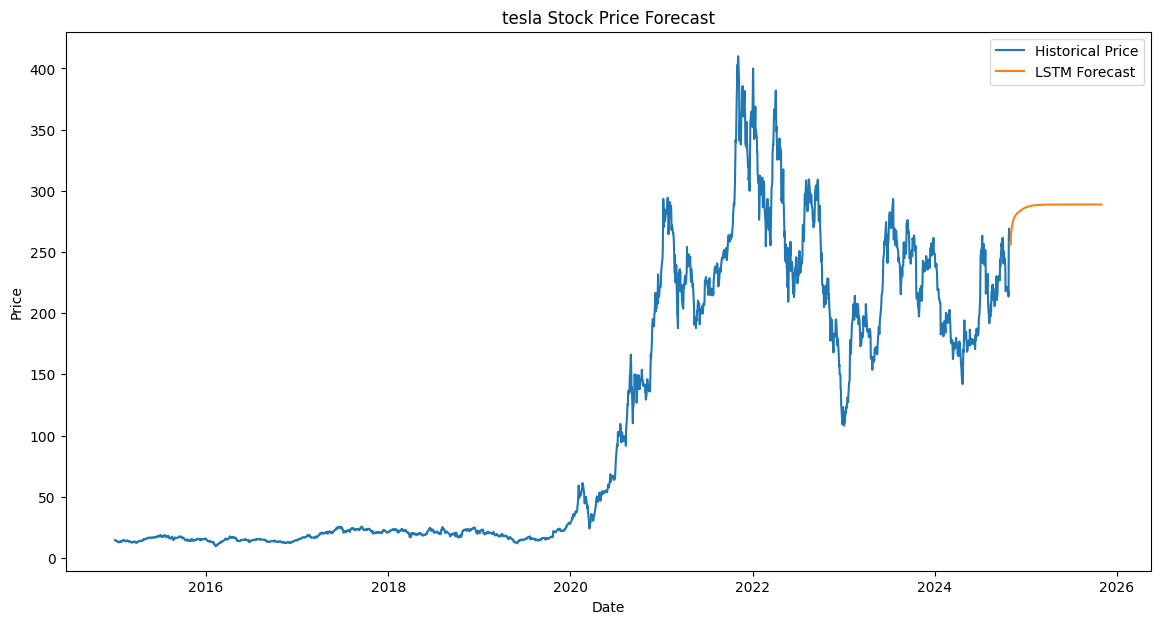

In [10]:
tsla_forecast, forecast_dates = predict(tsla,look_back,num_prediction, lstm_model)
plot_forecast(tsla,'tesla',tsla_forecast, forecast_dates)

- BND stock one year prediction

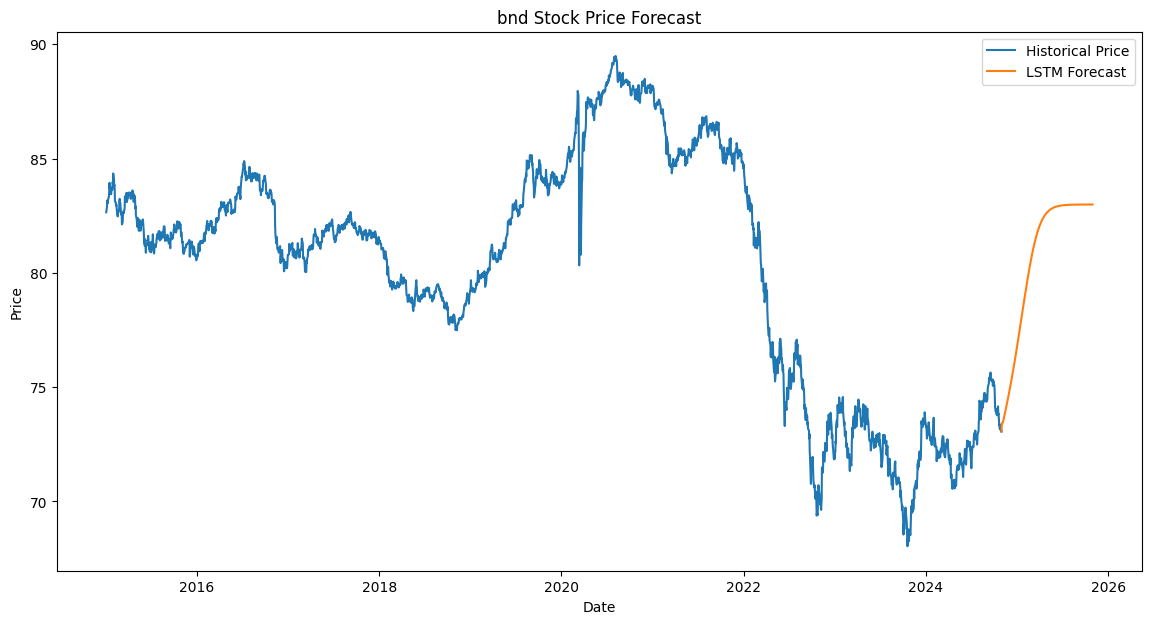

In [ ]:
forecast_byd, forecast_dates = predict(bnd,look_back,num_prediction, lstm_model)
plot_forecast(bnd,'bnd',forecast, forecast_dates)

- SPY stock one year prediction

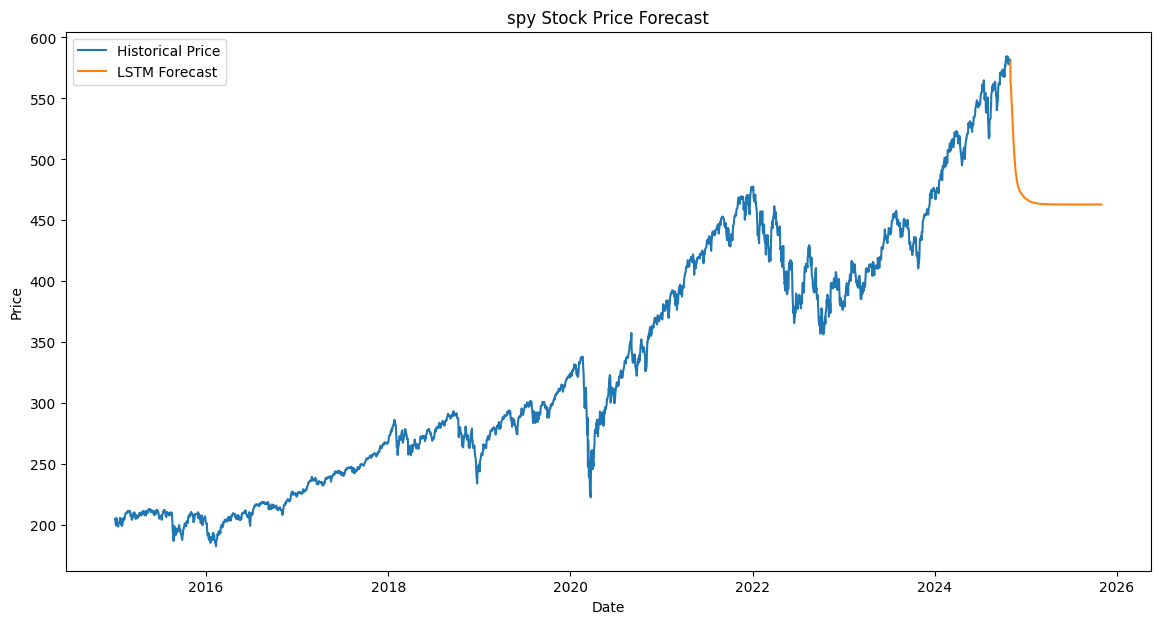

In [ ]:
forecast_spy, forecast_dates = predict(spy,look_back,num_prediction, lstm_model)
plot_forecast(spy,'spy',forecast_spy, forecast_dates_spy)

##  Interpret the Results

In [ ]:
# Calculate Confidence Intervals
# Let's assume a simple approach for confidence intervals based on the prediction std deviation
# You can adjust this method according to your needs
std_dev = np.std(tsla_forecast)
lower_bound = tsla_forecast - 1.96 * std_dev  # 95% confidence interval
upper_bound = tsla_forecast + 1.96 * std_dev

# Create a Date Range for the Forecast
# last_date = pd.to_datetime(X_test.index[-1])  # Assuming X_test has a DateTime index
# forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_horizon)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(data=tsla_forecast, index=forecast_dates, columns=['Forecast'])
forecast_df['Lower Bound'] = lower_bound
forecast_df['Upper Bound'] = upper_bound

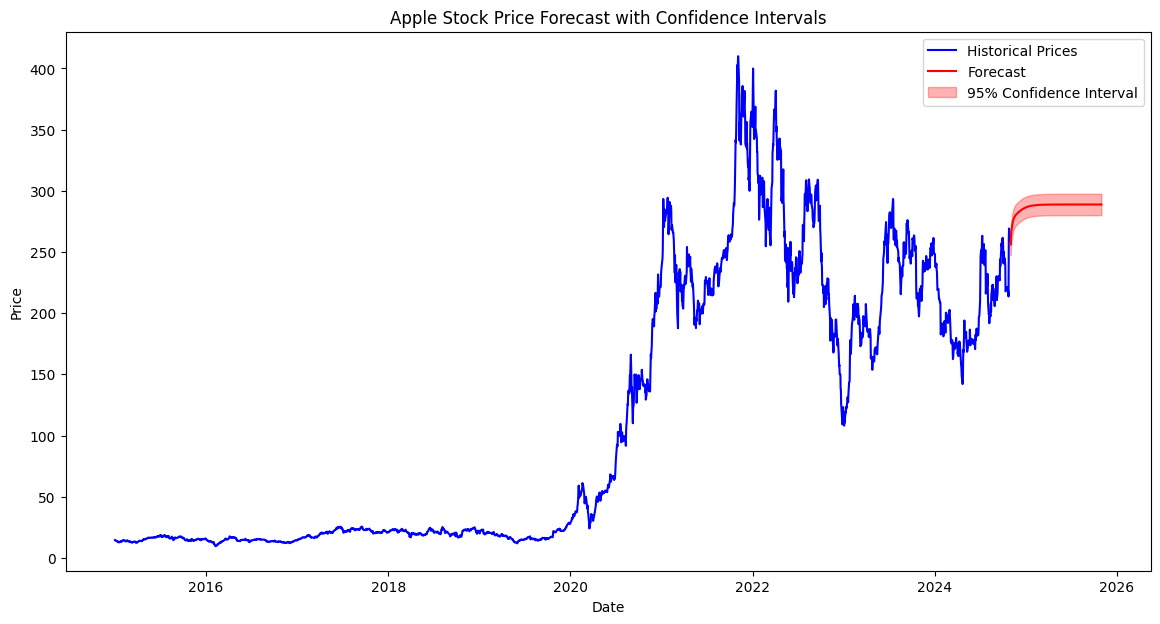

In [ ]:
# Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(tsla.index, tsla['Price'], label='Historical Prices', color='blue')  # Replace 'Price' with your actual column name
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='red', alpha=0.3, label='95% Confidence Interval')
plt.title('Apple Stock Price Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()